In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect,func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
#data=engine.execute("SELECT * FROM hawaii")



In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:

inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
#Calculate last date in the database
first_date= session.query(Measurement.date).order_by(Measurement.date.asc()).first()
print(first_date)
#Calculate last date in the database
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2010-01-01',)
('2017-08-23',)


In [17]:
# Calculate the date 1 year ago from the last data point in the database
Year_ago= dt.date(2017,8,23)-dt.timedelta(days=365)
print(Year_ago)

2016-08-23


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the data and precipitation scores

Prcp_query=session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date>='2016-08-23').all()
Prcp_query


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(Prcp_query,columns=['Date', 'Percipitaion'])
# Sort the dataframe by date
df=df.sort_values(by='Date')

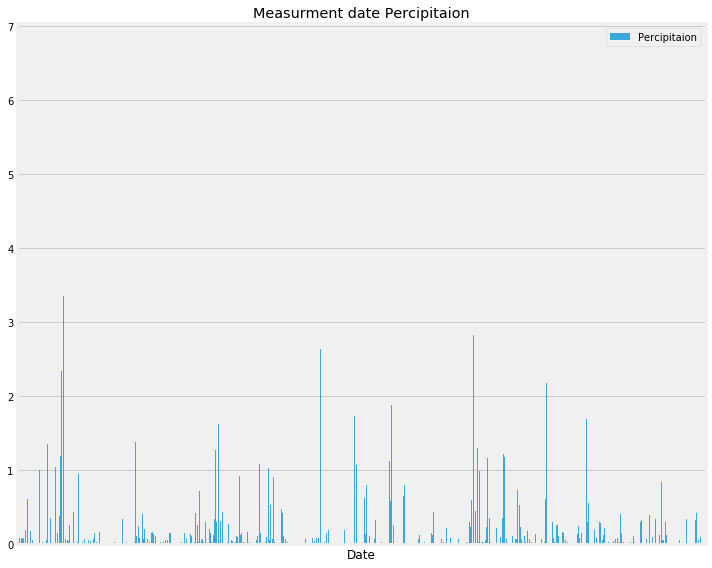

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
#df.set_index('Date',inplace=True)
df.plot.bar(x='Date',y='Percipitaion', title='Measurment date Percipitaion',figsize=(10,8),width=0.75, alpha=0.75)
plt.xticks([])
plt.tight_layout()
plt.show()


In [22]:
# Query to find all dates from the table
for i in session.query(Measurement.date).order_by(Measurement.id):
    print(i.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2011-01-22
2011-01-23
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22

2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-29
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-27
2011-06-28
2011-07-01
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-07
2011-08-13
2011-08-15
2011-08-16
2011-08-17
2011-08-18
2011-08-25
2011-08-26
2011-08-27
2011-08-29
2011-08-30
2011-08-31
2011-09-01
2011-09-02

2011-05-18
2011-05-19
2011-05-20
2011-05-23
2011-05-24
2011-05-25
2011-06-08
2011-06-09
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-20
2011-06-21
2011-06-22
2011-07-06
2011-07-07
2011-08-08
2011-08-10
2011-08-12
2011-08-24
2011-09-01
2011-09-02
2011-09-07
2011-09-09
2011-09-23
2011-09-26
2011-10-20
2011-10-31
2011-11-04
2012-01-05
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-14
2012-01-16
2012-01-17
2012-01-18
2012-01-19
2012-01-20
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-31
2012-02-06
2012-02-09
2012-02-10
2012-02-14
2012-02-15
2012-02-24
2012-02-27
2012-02-29
2012-03-01
2012-03-03
2012-03-04
2012-03-05
2012-04-02
2012-04-04
2012-04-05
2012-04-09
2012-04-16
2012-05-02
2012-05-09
2012-05-17
2012-05-18
2012-05-22
2012-05-24
2012-05-25
2012-05-27
2012-05-28
2012-06-01
2012-06-14
2012-06-21
2012-06-26
2012-06-29
2012-07-02
2012-07-20
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-30
2012-07-31
2012-08-01
2012-08-03

2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-09
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-16
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-23
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-06
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-12
2011-11-13
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31

2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-27
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-02
2013-11-03
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-09
2013-11-10
2013-11-11
2013-11-12
2013-11-13
2013-11-14
2013-11-15
2013-11-16
2013-11-17
2013-11-18
2013-11-19
2013-11-20
2013-11-21
2013-11-22
2013-11-23
2013-11-24
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29
2013-11-30
2013-12-01
2013-12-02
2013-12-03
2013-12-04
2013-12-05
2013-12-06
2013-12-07
2013-12-08
2013-12-09
2013-12-10
2013-12-11
2013-12-12
2013-12-13
2013-12-14
2013-12-15
2013-12-16
2013-12-17
2013-12-18
2013-12-19
2013-12-20
2013-12-21
2013-12-22
2013-12-23
2013-12-24
2013-12-25
2013-12-26
2013-12-27
2013-12-28
2013-12-29
2013-12-30
2014-01-01
2014-01-02
2014-01-03
2014-01-04
2014-01-05
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-11
2014-01-12
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
2014-01-18

2016-12-24
2016-12-25
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2016-12-31
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13
2017-01-14
2017-01-15
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-21
2017-01-22
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-01-28
2017-01-29
2017-01-30
2017-01-31
2017-02-01
2017-02-02
2017-02-04
2017-02-05
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10
2017-02-11
2017-02-12
2017-02-13
2017-02-14
2017-02-15
2017-02-16
2017-02-18
2017-02-19
2017-02-20
2017-02-21
2017-02-22
2017-02-23
2017-02-24
2017-02-25
2017-02-26
2017-02-27
2017-02-28
2017-03-01
2017-03-02
2017-03-03
2017-03-04
2017-03-05
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-11
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-18
2017-03-19
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24
2017-03-25
2017-03-26
2017-03-27
2017-03-28

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Percipitaion
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Design a query to show how many stations are available in this dataset?
Unique_stations_count=session.query(Measurement.station).distinct().count()
print(Unique_stations_count)
Unique_stations=session.query(Measurement.station).distinct().all()
print(Unique_stations)

9
[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


Most_Active_Stations=session.query(func.count(Measurement.station),Measurement.station).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Most_Active_Stations




[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'Highest temperature recorded:{Max_temp} for station USC00519281' )
Min_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'Lowest temperature recorded:{Min_temp} for station USC00519281' )
avg_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f'Avarage temperature recorded:{avg_temp} for station USC00519281' )

Highest temperature recorded:[(85.0,)] for station USC00519281
Lowest temperature recorded:[(54.0,)] for station USC00519281
Avarage temperature recorded:[(71.66378066378067,)] for station USC00519281


In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 2010-01-01
Temp_ObsQuery=session.query(Measurement.tobs)\
                 .filter(Measurement.date>='2016-08-23')\
                  .filter(Measurement.station=='USC00519281').all()
Temp_ObsQuery


[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

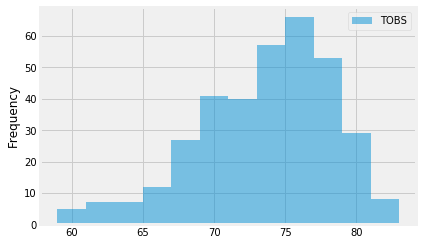

In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(Temp_ObsQuery,columns=['TOBS'])
# Sort the dataframe by date
#df=df.sort_values(by='Date')

df.plot.hist(alpha=0.5,bins=12)

![precipitation](Images/station-histogram.png)

In [50]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
